# SORU 1 - BLOOM FILTER

In [70]:
from bitarray import bitarray #bitarray kütüphanesinden import ettim
from matplotlib import pyplot as plt # grafik çizmek için
import re #yabancı kelimelerden temizlemek için

# Hash Fonksiyonlarım


Normalde buraya bir formül yerleştirmiştim (hash_idye göre değişen) fakat soruda 1-3 arası varsayabilirsiniz diyordu o yüzden sabit formüller koydum, daha iyi hash elde etmek adına. Hashlerken asal sayıları kullanmak bize daha doğru ve daha az çakışan hash değerleri vermektedir, bu yüzden ax+b -> hash fonksiyonunda a'yı tek sayı b yide a'dan küçük asal sayı seçmeye özen gösteririz. Tum karakterlerin ASCİİ değerini toplayıp hash fonksiyonunda döndüren bir fonksiyon topluluğu yazdım

In [71]:
#hash_id -> hash_fonksiyonu_sayisi'ni for loop ile dönersek her bir index değeri. Örneğin 3 için 0,1,2.


def hash_function(hash_id,key,array_uzunlugu):
    
    if(hash_id == 0):
    
        h = 0
        for char in key:
            h += ord(char)
            
        return (h*17+5) % array_uzunlugu
    elif(hash_id == 1):
       
        
        h = 0
        for char in key:
            h += ord(char)
            
        return (h*23-7) % array_uzunlugu
    else:
       
        
        h = 0
        for char in key:
            h += ord(char)
            
        return (h*19+2) % array_uzunlugu
    


In [72]:
## BURAYI TAMAMEN REGEX BİLDİĞİMİ GÖSTERMEK İÇİN ATIYORUM, ÖDEVİ TAM DOĞRU OKUYAMAMIŞIM.
## SON ANDA FARK ETTİM TÜRKÇE KARAKTERLERİ AYIRMAMI İSTEDİĞİNİZİ
## BU YÜZDEN BİLDİĞİME DAİR BUNU BURAYA EKLİYORUM ANLAYIŞINIZA SIĞINIYORUM.

def REGEX_BILIYORUM(filtreye_takilanlar,spam_file):
    sayi = 0
    spam = ""
    with open(spam_file , "r+" , encoding="utf-8") as f:
        spam = f.read()
    clean_spam = re.sub(r'^a-zA-Z\r\t\n' , '' , spam)
    lowered_spam = clean_spam.lower()
    final_spam = " ".join(lowered_spam.split())
    final_spam = final_spam.split(" ")

            


In [73]:
def bloom_filter(spam_list, test_dosyasi,filtre_arrayin_uzunlugu, hash_fonksiyon_sayisi):
    bit_array = bitarray(filtre_arrayin_uzunlugu) 
    # Burada filtre olarak kullanacağımız bit arrayi implement ediyoruz.
    
    bit_array.setall(0) 
    # Bit arrayimizdeki her değeri 0 olarak atıyoruz. Spam Listteki kelimeleri hashleyip buraya yerleştireceğiz
    
    spam_set = set() 
    # Bu seti bilerek kurdum çünkü en sonda false positivelere bakarken 2 tane array karşılaştırması yaparsak
    # O(n^2) run time bir algoritma elde edeceğiz ve çok verimsiz olacak onun yerine spam kelimeleri bir set'e atayacağım
    # böylece en son false positiveleri ayrıştırırken O(n) run time'a sahip olacak algoritmamız.
    
    # Burada r+, utf-8 encoding ile spam_listimizi açıyorum ve spam_array oluşturuyorum bu arrayi filtrede kullanacağız.
    spam_array = [] # Spam array initialize edildi
    with open(spam_list , "r+" , encoding="utf-8") as f:
        spam_array = f.readlines()
        
    # Burada spam sayılan bütün kelimeleri bitarrayimize hashleyip ilgini pozisyona yazarak, 
    # asıl metinimizde spam kelimeler var mı bunun karşılaştırmasını yapacağız. 
    for word in spam_array:
        # Burada hash_fonksiyon_sayisi kadar hashleyip bit arrayde ilgili pozisyonlara 1 yazdık.
        for hash_id in range(hash_fonksiyon_sayisi):
            hashed_index = hash_function(hash_id,word,filtre_arrayin_uzunlugu)
            bit_array[hashed_index] = 1
    
    
    words_array = [] # Words array initialize edildi
    # Burada incelenecek dosyayı okuyarak bir array'e kelimeleri aktarıyorum.
    with open(test_dosyasi,"r+" , encoding="utf-8") as f:
        words_array = f.readlines()
    
    filtreye_takilanlar = []
    #Bu words arrayindeki her bir kelimeyi hashleyerek bitarrayimizde ilgili pozisyonlarda var mı diye kontrol ediyoruz.
    for word in words_array:
        # Bu filtreyi geçti mi geçmedi mi bakmak için oluşturduğumuz bir boolean , False boolean değerini veriyoruz.
        # Filtreye takılanları bu bool ile yakalayacağız.
        passed = False
        for hash_id in range(hash_fonksiyon_sayisi):
                # Aynı hash işlemini uygulayıp bit array'de var mı diye bakıyoruz, eğer 1 tane bile hash pozisyonunda yoksa
                # Bu kelime filtreye takılmadan geçebilir demektir. Eğer 3ünde de varsa zaten passed değişkeni True kalacak
                # Birinde bile varsa break yaparak gereksiz iterationları engelledik.
                hashed_index = hash_function(hash_id,word,filtre_arrayin_uzunlugu)
                if(bit_array[hashed_index] == 0):
                    passed = True
                    break
        # Eğer filtreye takıldıysa
        
        
        if (not passed):
            # Burada en son false positive ayrıştırması yapmak için filtereye takılanları bir array halinde tutuyoruz
            filtreye_takilanlar.append(word)
            # Filtreye takılanları append modunda yeni bir dosyaya yazıyoruz
            with open("filtreye_takilanlar.txt" , "a" , encoding="utf-8") as f2:
                f2.write(word)
                

    ####
    false_positive_array = []
    for word in filtreye_takilanlar:
        if word not in spam_set:
            false_positive_array.append(word)
            
    return len(false_positive_array)
            
    

In [74]:
bloom_filter("filtrelenecek_kelimeler_2.txt","test_dosyasi_2.txt",1000,1)

1938

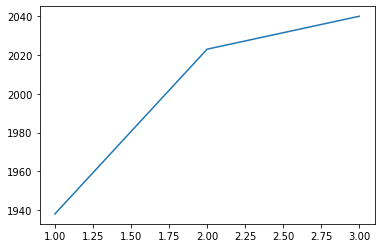

In [75]:
one_hash = bloom_filter("filtrelenecek_kelimeler_2.txt","test_dosyasi_2.txt",1000,1)

two_hash = bloom_filter("filtrelenecek_kelimeler_2.txt","test_dosyasi_2.txt",1000,2)
three_hash= bloom_filter("filtrelenecek_kelimeler_2.txt","test_dosyasi_2.txt",1000,3)


plt.plot([1,2,3],[one_hash,two_hash,three_hash])

In [76]:
def word_count(file):
    words = ""
    
    with open(file,"r+" , encoding="utf-8") as f:
        words = f.read()
    words = re.sub(r'^a-zA-Z\r\t\n' , '' , words)
    words = words.lower()
    words = " ".join(words.split())
    words = words.split(" ")
    return len(words)

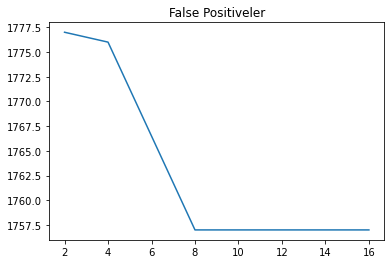

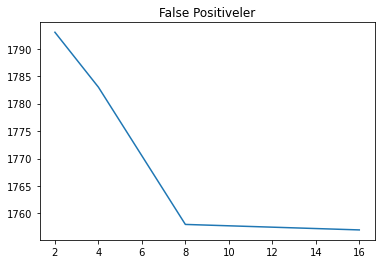

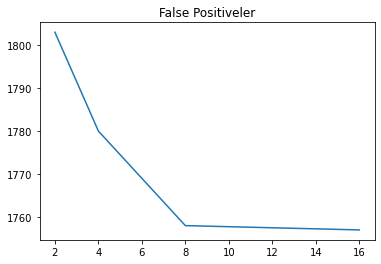

In [77]:
hashler = [1,2,3]
kat_sayilar = [2,4,8,16]


for _hash in hashler:
    false_positives = []
    for kat in kat_sayilar:
        false_positive_n = bloom_filter("filtrelenecek_kelimeler_2.txt","test_dosyasi_2.txt",word_count("test_dosyasi_2.txt")*kat,_hash)

        false_positives.append(false_positive_n)
        
        
    plt.title("False Positiveler")
    plt.plot(kat_sayilar,false_positives)
    plt.show()
        
        

# SORU 2 - FLAJOLET-MARTIN

Flajolet Martin algoritmasında asıl amaç girilen verileri hashleyip çıkan değerleri bit değerlerine çevirmektir. Sonra çıkan bit değerlerinde kaç tane 0 trail ediyor bunu bulup max trail eden 0 değerinin karesini alarak distinct elementlere ulaşılır.


In [2]:

def word_counter(doc):
    with open("ornek_dosya.txt" , "r+" , encoding="utf-8") as f:
        words = f.readlines()
        return [len(f.read().split()) , f.readlines()]

In [3]:
word_counter("ornek_dosya.txt")

[0, []]

In [6]:
def hash_function(hash_id,key):
    
    if(hash_id == 0):
    
        h = 0
        for char in key:
            h += ord(char)
            
        return (h*17+5) % 32
    elif(hash_id == 1):
       
        
        h = 0
        for char in key:
            h += ord(char)
            
        return (h*23+9) % 12
    elif(hash_id == 2):
       
        
        h = 0
        for char in key:
            h += ord(char)
            
        return (h*23+4) % 12
    elif(hash_id == 3):
       
        
        h = 0
        for char in key:
            h += ord(char)
            
        return (h*23-7) % 12
    elif(hash_id == 4):
       
        
        h = 0
        for char in key:
            h += ord(char)
            
        return (h*22-1) % 13
    else:
       
        
        h = 0
        for char in key:
            h += ord(char)
            
        return (h*3+2) % 22
    


In [12]:
maxx=0
for i in range(0,word_counter("ornek_dosya.txt")[0]):
    val= bin(hash_function(4,word_counter("ornek_dosya.txt")[1][i]))[2:]
    
    toplam=0
    for j in range(len(val)-1,0,-1):
        
        if val[j]=='0':
            toplam+=1
        else:
            break
    if toplam>maxx:
        maxx=toplam
        
print('distict elements', 2**maxx)

distict elements 1
